In [51]:
"""
Syntax dibawah merupakan syntax untuk mengimport/memanggil library library yang akan
digunakan untuk mengolah citra yang ada, library-library yang digunakan antara lain, 
metplotlib.pyplot (plt), cv2, os dan numpy (np)
"""
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [52]:
"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function subplot
yang digunakan untuk menampilkan hasil citra dan perubahannya. Cara memanggilnya 
cukup dengan menulis nama function dan memenuhi parameternya jika ada
"""
def display (imgData, labels):
  fig, axs = plt.subplots (1, len(imgData), figsize = (30, 43))

  """
  Syntax dibawah merupakan perulangan for yang digunakan 
  untuk iterasi dari data pertama pada imgData sampai data
  terakhir pada imgData
  """
  for i in range (len (imgData)):
    axs[i].imshow (imgData[i], 'gray')
    axs[i].title.set_text (labels[i])

In [53]:
"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function normalisasi
yang digunakan untuk melakukan normalisasi pada citra. Cara memanggilnya 
cukup dengan menulis nama function dan memenuhi parameternya jika ada
"""
def normalisasi (citra):
  min = np.min (citra)
  max = np.max (citra)

  """
  Syntax dibawah merupakan pengembalian hasil pemrosesan 
  normalisasi yang dilakukan pada sebuah citra
  setelah pemanggilan dari function ini
  """
  return np.round ((citra-min)*1/(max-min))

In [54]:
"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function threshold
yang digunakan untuk melakukan thresholding pada citra. Cara memanggilnya 
cukup dengan menulis nama function dan memenuhi parameternya jika ada
"""
def threshold (img, T = 127):
  #Membuat kondisi channel image
  if (len (img.shape)>2):
    print ("Please insert grayscale or 2 channeled image") 
    return img
  else:
    img[img>T] = 255
    img[img<=T] = 0

  """
  Syntax dibawah merupakan pengembalian hasil pemrosesan 
  threshold lalu normalisasi yang dilakukan pada sebuah 
  citra setelah pemanggilan dari function ini
  """
  return normalisasi (img)

In [55]:
"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function cekErosi
yang digunakan untuk melakukan pengecekan hasil erosi pada citra. Cara memanggilnya 
cukup dengan menulis nama function dan memenuhi parameternya jika ada
"""
def cekErosi (temp, element):
    """
    Membuat potongan matriks yang diperiksa menjadi 1 dimensi
    """
    temp = temp.ravel()
    for i in range (len (temp)):
      """
      Jika piksel element bernilai 1 akan tetapi piksel potongan matriks yang 
      diperiksa tidak sama dengan satu maka return false
      """
      if (element[i] == 1 and temp[i] != 1): 
        return False

    """
    Jika semua bernilai True maka penambahan piksel dapat dilakukan (True)
    """
    return True

"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function erosi
yang digunakan untuk melakukan proses erosi pada citra. Cara memanggilnya 
cukup dengan menulis nama function dan memenuhi parameternya jika ada
"""
def erosi (citra, kernel):
    tinggi, lebar = kernel.shape
    tinggi, lebar = tinggi//2, lebar//2
    result = np.zeros (citra.shape, np.uint8)  #mendeklarasi citra hasil
    pad = np.pad (citra, (tinggi, lebar), mode = 'edge') #memberikan padding pada citra
    kernel = kernel.ravel()
    for i in range (tinggi, len (pad)-tinggi):  #melakukan perulangan pada nilai asal citra yg telah di padding
        for j in range (lebar, len (pad[i])-lebar):  #melakukan perulangan pada nilai asal citra yang telah dipadding
            temp = pad[i-tinggi : i+tinggi+1, j-lebar : j+lebar+1] #diambil potongan matriks sesuai ukuran kernel dari citra yang telah dipadding
            cek = cekErosi (temp, kernel) 
            if (cek):
              result[i-tinggi][j-lebar] = 1

    """
    Syntax dibawah merupakan pengembalian hasil 
    pemrosesan erosi yang dilakukan pada sebuah 
    citra setelah pemanggilan dari function ini
    """
    return result #return result

"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function dilasi
yang digunakan untuk melakukan proses dilasi pada citra. Cara memanggilnya 
cukup dengan menulis nama function dan memenuhi parameternya jika ada
"""
def dilasi (citra, element):
    tinggi, lebar = element.shape
    tinggi, lebar = tinggi//2, lebar//2
    result = np.zeros (citra.shape, np.uint8) #mendeklarasi citra hasil
    pad = np.pad (citra, (tinggi,lebar), mode = 'constant') #memberikan padding pada citra
    for i in range (tinggi, len (pad)-tinggi):  #melakukan perulangan pada baris nilai asal citra yg telah di padding
        for j in range (lebar, len (pad[i])-lebar):  #melakukan perulangan pada kolom nilai asal citra yg telah di padding
            temp = pad[i-tinggi : i+tinggi+1, j-lebar : j+lebar+1] #diambil potongan matriks sesuai ukuran kernel dari citra yang telah dipadding
            cek = (temp == 1) & (element == 1) 
            if (np.any (cek)): #jika terdapat piksel dimana element bernilai satu dan potongan matriks juga bernilai satu 
              result[i-tinggi][j-lebar] = 1 #maka pixel origin citra diberi nilai 1

    """
    Syntax dibawah merupakan pengembalian hasil 
    pemrosesan dilasi yang dilakukan pada sebuah 
    citra setelah pemanggilan dari function ini
    """
    return result 

"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function opening
yang digunakan untuk melakukan proses opening pada citra. Cara memanggilnya 
cukup dengan menulis nama function dan memenuhi parameternya jika ada
"""
def opening (img, element):

  """
  Syntax dibawah merupakan pengembalian hasil 
  pemrosesan opening yang dilakukan pada sebuah 
  citra setelah pemanggilan dari function ini
  """
  return dilasi (erosi (img, element), element)

"""
Syntax dibawah merupakan pendefinisian sebuah function yaitu function closing
yang digunakan untuk melakukan proses closing pada citra. Cara memanggilnya 
cukup dengan menulis nama function dan memenuhi parameternya jika ada
"""
def closing(img, element):

  """
  Syntax dibawah merupakan pengembalian hasil 
  pemrosesan closing yang dilakukan pada sebuah 
  citra setelah pemanggilan dari function ini
  """
  return erosi(dilasi (img, element), element)

In [56]:
# mendefinisikan elips structure element
element = cv2.getStructuringElement (cv2.MORPH_ELLIPSE, (7, 7))
element

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [57]:
#load black and white images
imgpath = 'dataset/color_segmented/'
imgData = []
labels = []
i = 0
for filename in os.listdir (imgpath):
    imgData.append (cv2.imread (imgpath+filename))
    imgData[i] = cv2.cvtColor (imgData[i],cv2.COLOR_RGB2GRAY)
    labels.append (filename)
    i+=1

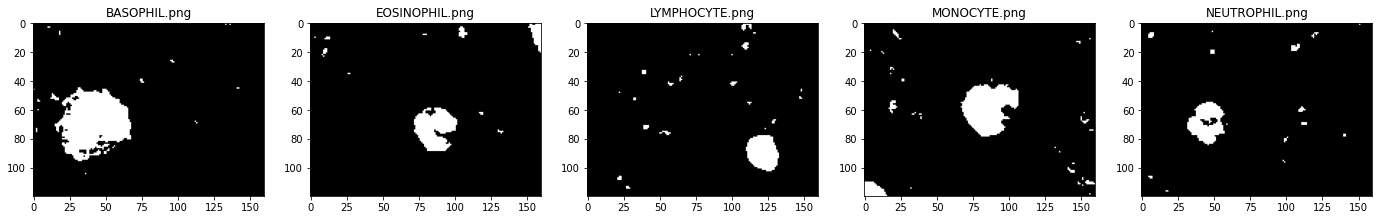

In [58]:
"""
Syntax dibawah merupakan syntax untuk memanggil fungsi display
guna menampilkan citra asli dari citra yang akan diproses setelah 
function dipanggil dengan memenuhi parameternya
"""
display (imgData, labels)

In [59]:
"""
Syntax dibawah merupakan deklarasi variabel untuk
menampung data hasil operasi erosi, dilasi, opening
dan closing
"""
erosion_img = []
dilation_img = []
opening_img = []
closing_img = []

In [60]:
"""
Syntax dibawah merupakan deklarasi variabel untuk
menampung hasil operasi thresholding pada citra
"""
thresh = []
for img in imgData:
    thresh.append (threshold(img))

In [61]:
"""
Syntax dibawah merupakan syntax untuk 
melakukan proses erosi dilasi pada citra
"""
for img in thresh:
    erosion_img.append (erosi (img, element))
    dilation_img.append (dilasi (img, element)) 

In [62]:
"""
Syntax dibawah merupakan syntax untuk 
melakukan proses opening pada citra
"""
for img in erosion_img:
    opening_img.append(dilasi(img, element))

"""
Syntax dibawah merupakan syntax untuk 
melakukan proses closing pada citra
"""
for img in dilation_img:
    closing_img.append(erosi(img, element))
        

hasil erosi : 


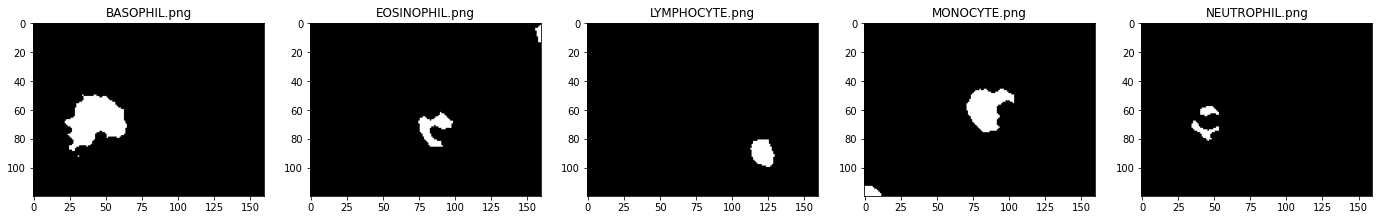

In [63]:
"""
Syntax dibawah merupakan syntax untuk memanggil fungsi display
guna menampilkan hasil pemrosesan erosi citra setelah 
function dipanggil dengan memenuhi parameternya
"""
print ("hasil erosi : ")
display (erosion_img, labels)

hasil dilasi : 


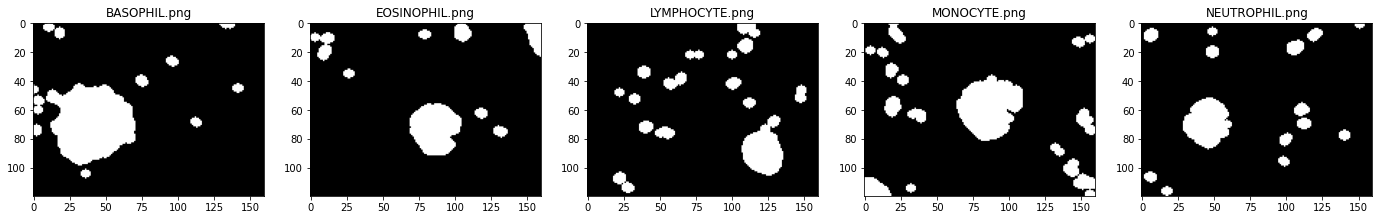

In [64]:
"""
Syntax dibawah merupakan syntax untuk memanggil fungsi display
guna menampilkan hasil pemrosesan dilasi citra setelah 
function dipanggil dengan memenuhi parameternya
"""
print ("hasil dilasi : ")
display (dilation_img, labels)

hasil opening : 


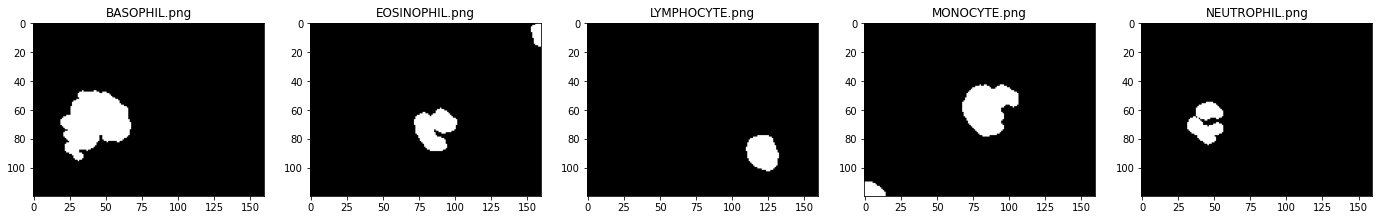

In [65]:
"""
Syntax dibawah merupakan syntax untuk memanggil fungsi display
guna menampilkan hasil pemrosesan opening citra setelah 
function dipanggil dengan memenuhi parameternya
"""
print ("hasil opening : ")
display (opening_img, labels)

hasil closing : 


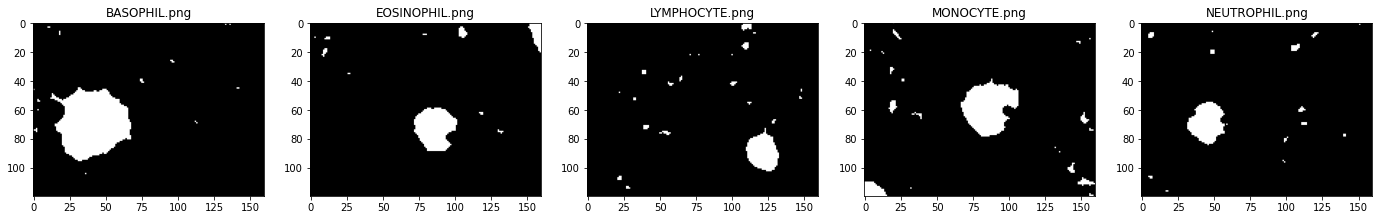

In [66]:
"""
Syntax dibawah merupakan syntax untuk memanggil fungsi display
guna menampilkan hasil pemrosesan closing citra setelah 
function dipanggil dengan memenuhi parameternya
"""
print ("hasil closing : ")
display (closing_img, labels)